In [0]:
!ls /content/drive/My\ Drive/station_simulation

check.py    config.py  Infections	   learn_simple.py  simple.py
compare.py  data       learn_simple.ipynb  __pycache__	    sweep.py


In [0]:
import sys
#sys.path.append("/content/gdrive/My Drive/station_simulation")
sys.path.append("/content/drive/My Drive/station_simulation")
#sys.path.append('/content/drive/My Drive')

import simple
import config
import numpy as np
from Infections.Agent import State
from Infections.InfectionExecution import InfectionExecution

In [0]:
del sys.path[-1]

In [4]:
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/station_simulation']


In [0]:
# tests:
mytests = {}
mytests[0] = {
    'type': 'TestNull',
    'parameters': {}
}


def boolvec2str(vec):
    return ''.join(list(map( lambda b: '1' if b else '0',
                             vec )))


def get_run(usetest):
    """
    run a simulation with the specified test.

    Arguments:
    Test as 'usetest'
    
    Returns:
    the run
    """
    ids = list(range(config.N))
    u, i, s, m, q, d, working, infex, test, state_vec = simple.run_sim(usetest, return_state_vec= True)

    # observables
    dead = []
    symptomatic = []
    contactgraphs = []

    # non observable
    infected = []

    for t in range(len(state_vec)):
        vec = state_vec[t]
        # dead
        dead += [ list(map( lambda x: x == State.DEAD,
                            vec )) ]
        # symptomatic
        sym = infex.get_symptomatic(t= t)
        symptomatic += [ list(map( lambda x: x in sym,
                                   ids )) ]
        # contact graphs
        contactgraphs += [ infex.get_contactgraph_attime(t= t) ]
        # infected
        infected += [ list(map( lambda x: x == State.INFECTED_SPREADING or x == State.INFECTED_NONSPREADING,
                                vec )) ]
    return dead, symptomatic, contactgraphs, infected


# main
if __name__ == "__main__":
    # turn off standard output
    config.plotting = False
    config.output_singleruns = False
    config.output_summary = False

    # choose test
    usetest = mytests[0]
    
    # number of runs to get
    N_runs = 1

    # sweep the test
    for i in range(N_runs):
        dead, symptomatic, contactgraphs, infected = get_run(usetest= usetest)
        # available:
        #print(dead) # time -> id -> Bool
        #print(symptomatic) # time -> id -> Bool
        #print(contactgraphs) # time -> id -> list of contact ids
        #print(infected) # time -> id -> Bool
        

In [0]:
config.N

10

In [0]:
def boolToInt(list):
    #list = np.array([int(el) for el in list])
    list = [int(el) for el in list]
    return list

def flatten_list(list):
    flat_list = []
    for sublist in list:
        for item in sublist:
            flat_list.append(item)
    return flat_list

def intListToBoolList(list, n=config.N):
    #vec = np.zeros(n)
    #vec = [0] * n
    vec = [np.random.rand(1)/10.0 for i in range(n)]
    for i in list:
        vec[i] = 1 + np.random.rand(1)/10.0
    return vec

#def dictToList(dict):
#    list = [value for key, value in dict.items()]
#    return list

def runToList(dead, symptomatic, contactgraphs, infected):
    x = []
    y = []
    for t in range(config.T):
        tlist = []
        for p in range(config.N):
            plist = [int(dead[t][p]) + np.random.rand(1)/10.0] + [int(symptomatic[t][p]) + np.random.rand(1)/10.0]
            plist = plist + intListToBoolList(contactgraphs[t][p],config.N)
            #tlist.append(plist)
            tlist = tlist + plist
        x.append(tlist)
        y.append(boolToInt(infected[t]))
    return x, y

def runToImages(dead, symptomatic, contactgraphs, infected):
    images  = [ [ [[0,0,0] for _ in range(config.N)] for _ in range(config.N)] for _ in range(config.T)]
    yimages = [ [ [0 for _ in range(config.N)] for _ in range(config.N)] for _ in range(config.T)]
    for t in range(config.T):
        #print(t)
        for i in range(config.N):
            images[t][i][i][0] = int(dead[t][i])
            images[t][i][i][1] = int(symptomatic[t][i])
            images[t][i][i][2] = 1
            for j in contactgraphs[t][i]:
                images[t][i][j][2] = 1
                images[t][j][i][2] = 1
            yimages[t][i][i] = int(infected[t][i])
            
    return images, yimages

In [0]:
[ [0] * 4 for _ in range(2)]

[[0, 0, 0, 0], [0, 0, 0, 0]]

In [0]:
dead, symptomatic, contactgraphs, infected = get_run(usetest= usetest)
#x, y = runToList(dead, symptomatic, contactgraphs, infected)
images, yimages = runToImages(dead, symptomatic, contactgraphs, infected)

images = np.array(images).reshape(config.T,config.N,config.N,3)
yimages = np.array(yimages).reshape(config.T,config.N,config.N,1)

In [16]:
yimages.shape
yimages[40][3][3]

#for t in range(config.T):
#    for i in range(config.N):
#        if images[t][i][i][1] == 1:
#            print(t, ', ', i)

NameError: ignored

In [30]:
data_size = 100
X_data = []
Y_data = []
usetest = mytests[0]
N_runs = 1

for i in range(data_size):
    if i % 100 == 0:
      print(i)
    dead, symptomatic, contactgraphs, infected = get_run(usetest= usetest)
    x, y = runToImages(dead, symptomatic, contactgraphs, infected)
    X_data.append(x)
    Y_data.append(y)

#X_data = np.array(X_data).reshape(data_size,config.T,config.N*(config.N+2))
#Y_data = np.array(Y_data).reshape(data_size,config.T,config.N)

X_data = np.array(X_data).reshape(data_size,config.T,config.N,config.N,3)
Y_data = np.array(Y_data).reshape(data_size,config.T,config.N,config.N,1)


0


In [6]:
#X_data = np.array(X_data).reshape(data_size,config.T,config.N*(config.N+2))
#print(len(X_data))
Y_data.shape

(10, 93, 10, 10, 1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

In [0]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation="tanh", input_shape=(None,config.N*(config.N+2))))
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences=True, activation="tanh"))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(config.N, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')

In [41]:
history = model.fit(X_data, Y_data, epochs=100, validation_split=0.2, verbose=1, batch_size=5)

Epoch 1/100


ValueError: ignored

In [0]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=10, kernel_size=(10, 1),
                   input_shape=(None, 10, 10, 3),
                   padding='same', return_sequences=True))
seq.add(ConvLSTM2D(filters=10, kernel_size=(1, 10),
                   input_shape=(None, 10, 10, 3),
                   padding='same', return_sequences=True))
seq.add(ConvLSTM2D(filters=10, kernel_size=(10, 1),
                   input_shape=(None, 10, 10, 3),
                   padding='same', return_sequences=True))
seq.add(Dense(1, activation="sigmoid"))

seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [11]:
seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 10, 10, 10)  5240      
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 10, 10, 10)  8040      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10, 10, 1)   11        
Total params: 13,291
Trainable params: 13,291
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = seq.fit(X_data, Y_data, epochs=100, validation_split=0.2, verbose=1, batch_size=1)

Epoch 1/100
80/80 [==============================] - 32s 399ms/step - loss: 0.7064 - val_loss: 0.7053
Epoch 2/100
80/80 [==============================] - 32s 396ms/step - loss: 0.7042 - val_loss: 0.7030
Epoch 3/100
80/80 [==============================] - 31s 394ms/step - loss: 0.7018 - val_loss: 0.7007
Epoch 4/100
80/80 [==============================] - 32s 395ms/step - loss: 0.6994 - val_loss: 0.6982
Epoch 5/100
80/80 [==============================] - 32s 396ms/step - loss: 0.6969 - val_loss: 0.6955
Epoch 6/100
80/80 [==============================] - 32s 396ms/step - loss: 0.6941 - val_loss: 0.6927
Epoch 7/100
80/80 [==============================] - 32s 396ms/step - loss: 0.6911 - val_loss: 0.6895
Epoch 8/100
80/80 [==============================] - 32s 397ms/step - loss: 0.6878 - val_loss: 0.6860
Epoch 9/100
80/80 [==============================] - 32s 395ms/step - loss: 0.6840 - val_loss: 0.6819
Epoch 10/100
80/80 [==============================] - 32s 400ms/step - loss: 0.679

In [10]:
import matplotlib.pyplot as plt

#a = np.random.random((16, 16))
#plt.imshow(a, cmap='hot', interpolation='nearest')
#plt.show()

threshold = 0.3

T_data = []
dead, symptomatic, contactgraphs, infected = get_run(usetest= usetest)
x, y = runToList(dead, symptomatic, contactgraphs, infected)
T_data.append(x)
T_data = np.array(T_data).reshape(1,config.T,config.N*(config.N+2))
y = np.array(y).reshape(1,config.T,config.N)

test_output = model.predict(T_data, verbose=0)
y = y.reshape(config.T,config.N)
pred = np.around(test_output - threshold + 0.5,0)
pred = pred.reshape(config.T,config.N)

f = plt.figure()
plt.figure(figsize=(9,9))
plt.subplot(1, 2, 1)
plt.imshow(1-y, cmap='hot', interpolation='nearest')
plt.subplot(1, 2, 2)
plt.imshow(1-pred, cmap='hot', interpolation='nearest')
plt.tight_layout()
plt.show(block=True)

print(np.around(test_output,2))
#print(np.around(test_output,1))

NameError: ignored

<Figure size 432x288 with 0 Axes>

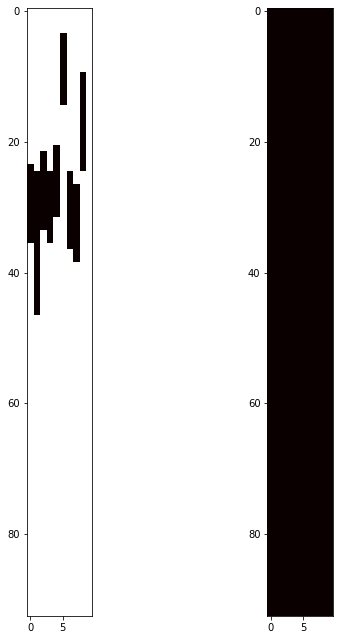

In [37]:

# for CNN LSTM

import matplotlib.pyplot as plt

#a = np.random.random((16, 16))
#plt.imshow(a, cmap='hot', interpolation='nearest')
#plt.show()

threshold = 0.5

dead, symptomatic, contactgraphs, infected = get_run(usetest= usetest)
x, y = runToImages(dead, symptomatic, contactgraphs, infected)
z = seq.predict([x], verbose=0)

test = [ [0 for _ in range(config.N)] for _ in range(config.T)]
for t in range(config.T):
    for i in range(config.N):
        test[t][i] = y[t][i][i]

pred = [ [0 for _ in range(config.N)] for _ in range(config.T)]
for t in range(config.T):
    for i in range(config.N):
        pred[t][i] = np.around(z[0][t][i][i] - threshold + 0.5,0)

y = np.array(test).reshape(config.T,config.N)
pred = np.array(pred).reshape(config.T,config.N)

f = plt.figure()
plt.figure(figsize=(9,9))
plt.subplot(1, 2, 1)
plt.imshow(1-y, cmap='hot', interpolation='nearest')
plt.subplot(1, 2, 2)
plt.imshow(1-pred, cmap='hot', interpolation='nearest')
plt.tight_layout()
plt.show(block=True)

In [66]:
pred[80]

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [81]:

z_data = seq.predict(x_data, verbose=0)

y = [ [0 for _ in range(config.N)] for _ in range(config.T)]
for i in range(config.N):
    y[t][i] = y_data[0][t][i][i]

y = np.array(y).reshape(config.T,config.N)
f = plt.figure()
plt.figure(figsize=(9,9))
plt.imshow(1-y, cmap='hot', interpolation='nearest')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [53]:
#x_data = [x]
#y_data = [y]


y = [ [0 for _ in range(config.N)] for _ in range(config.T)]
for i in range(config.N):
    y[t][i] = y_data[0][t][i][i]

pred = [ [0 for _ in range(config.N)] for _ in range(config.T)]
for i in range(config.N):
    pred[t][i] = z_data[0][t][i][i]

y = np.array(y).reshape(config.T,config.N)
pred = np.array(pred).reshape(config.T,config.N)


f = plt.figure()
plt.figure(figsize=(9,9))
plt.subplot(1, 2, 1)
plt.imshow(1-y, cmap='hot', interpolation='nearest')
plt.subplot(1, 2, 2)
plt.imshow(1-pred, cmap='hot', interpolation='nearest')
plt.tight_layout()
plt.show(block=True)


0.4970789